# T3 Moving Average Indicator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
import talib as ta

In [4]:
e1 = ta.EMA(df['Adj Close'], timeperiod=3)
e2 = ta.EMA(e1, timeperiod=3)
e3 = ta.EMA(e2, timeperiod=3)
e4 = ta.EMA(e3, timeperiod=3)
e5 = ta.EMA(e4, timeperiod=3)
e6 = ta.EMA(e5, timeperiod=3)
# a is the volume factor, default value is 0.7 but 0.618 can also be used
a = 0.7
c1 = -a**3
c2 = (3*a**2) + (3*a**3)
c3 = - (6*a**2) - (3*a) - (3*a**3)
c4 = 1 + (3*a) + (a**3) + (3*a**2)

In [5]:
df['T3'] = c1*e6 + c2*e5 + c3*e4 + c4*e3

In [6]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,T3
Date,,,,,,,
2018-08-17,213.440002,217.949997,213.160004,217.580002,215.897522,35427000,211.991717
2018-08-20,218.100006,219.179993,215.110001,215.460007,213.793930,30287700,213.592391
2018-08-21,216.800003,217.190002,214.029999,215.039993,213.377167,26159800,214.120762
2018-08-22,214.100006,216.360001,213.839996,215.050003,213.387085,19018100,214.105456
2018-08-23,214.649994,217.050003,214.600006,215.490005,213.823685,18883200,214.050022


In [7]:
from matplotlib import dates as mdates
import datetime as dt


df['VolumePositive'] = df['Open'] < df['Adj Close']
df = df.dropna()
df = df.reset_index()
df['Date'] = mdates.date2num(df['Date'].astype(dt.date))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,T3,VolumePositive
0,736923.0,213.440002,217.949997,213.160004,217.580002,215.897522,35427000,211.991717,True
1,736926.0,218.100006,219.179993,215.110001,215.460007,213.793930,30287700,213.592391,False
2,736927.0,216.800003,217.190002,214.029999,215.039993,213.377167,26159800,214.120762,False
3,736928.0,214.100006,216.360001,213.839996,215.050003,213.387085,19018100,214.105456,False
4,736929.0,214.649994,217.050003,214.600006,215.490005,213.823685,18883200,214.050022,False


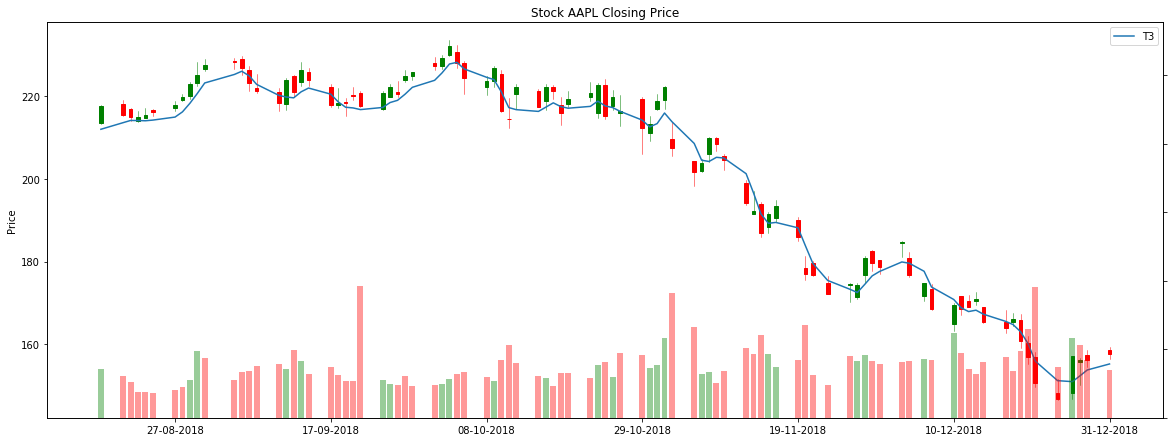

In [15]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(20,16))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['T3'],label='T3')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

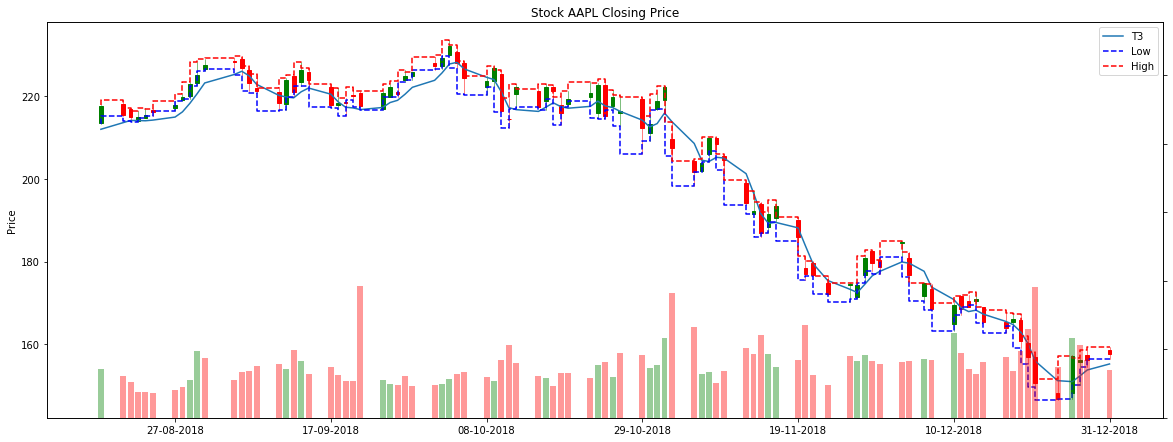

In [19]:
fig = plt.figure(figsize=(20,16))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['T3'],label='T3')
ax1.step(df.Date, df['Low'], c='blue', linestyle='--', label='Low')
ax1.step(df.Date, df['High'], c='red', linestyle='--', label='High')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

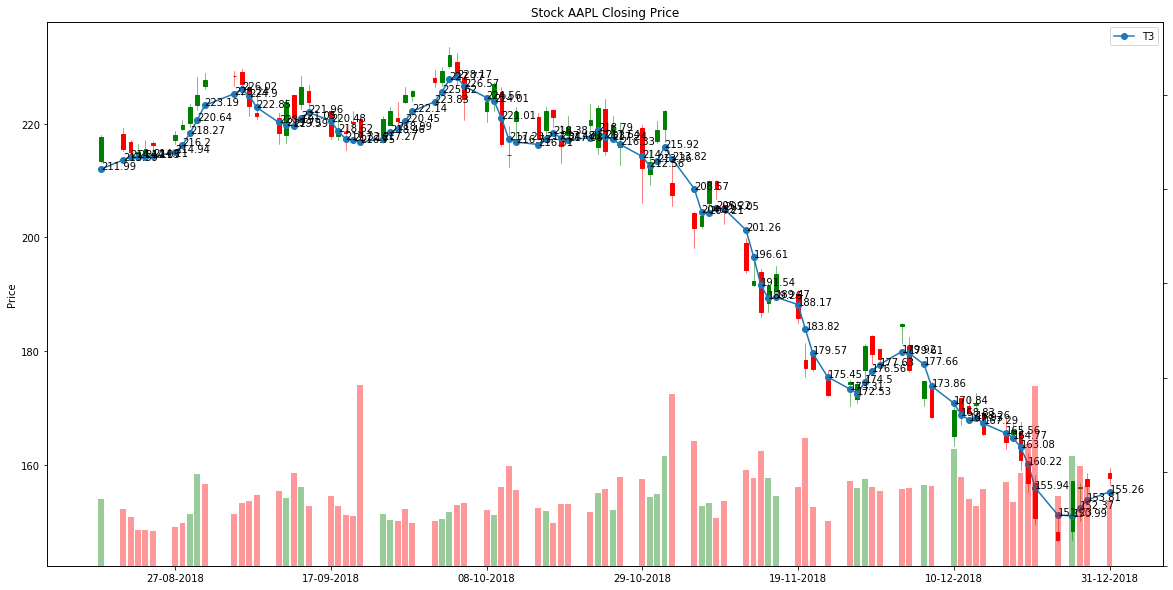

In [33]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
plt.plot(df.Date, df['T3'],marker='o',label='T3')
for i,j in zip(df.Date, round(df['T3'],2)):
    ax1.annotate(j, xy=(i, j))
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')
plt.show()

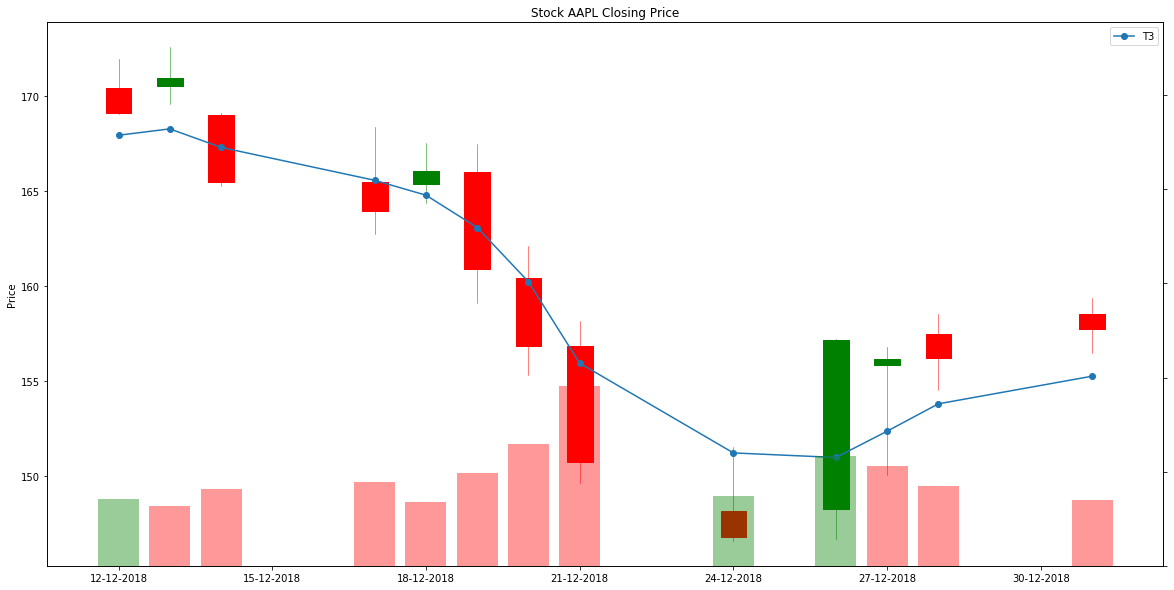

In [77]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
candlestick_ohlc(ax1,df.values[80:], width=0.5, colorup='g', colordown='r', alpha=1.0)
plt.plot(df.iloc[80:, 0], df['T3'][80:],marker='o',label='T3')
for i,j in zip(df.Date[100:], round(df['T3'],2)):
    ax1.annotate(j, xy=(i, j))
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.iloc[80:, 0], df['Volume'][80:], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')
plt.show()